In [1]:
from utils import *
from experiment import *

import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
plt.style.use("light")

PATH = "/home/max/Temp/Praktikum/longitudinal/"
SAVE_PATH = "/home/max/Nextcloud/Praktikum/Report/figures/longitudinal/"
REPEAT = 3

def plot_result(xlabel, name, steps, loop_times, errors, relaxation_times ,logx=[False, False, False, False], logy=[False, False, False, False]):
    fig,ax = plt.subplots(1,3,figsize=(10,3))
    
    plot_confidence_interval(ax[0], steps, loop_times)
    plot_confidence_interval(ax[1], steps, errors[:,:,0])
    ax[2].plot(steps, errors[0,:,1], "o-", color="black")

    set_labels(ax, xlabel)
    
    if logx[0]:
        ax[0].set_xscale("log")
    if logx[1]:
        ax[1].set_xscale("log")
    if logx[2]:
        ax[2].set_xscale("log")
        
    if logy[0]:
        ax[0].set_yscale("log")
    if logy[1]:
        ax[1].set_yscale("log")
    if logy[2]:
        ax[2].set_yscale("log")

    plt.tight_layout()
    plt.savefig(SAVE_PATH + name + ".pdf", dpi=300, bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(4,3))
    plt.plot(steps, relaxation_times[0], "o-")
    plt.xlabel(xlabel)
    plt.ylabel("Relaxation Time $\\tau$ $\left[s^{-1}\\right]$")
    if logx[3]:
        plt.xscale("log")
    if logy[3]:
        plt.yscale("log")
        
    plt.savefig(SAVE_PATH + "relaxation_time_" + name + ".pdf", dpi=300, bbox_inches="tight")

# Single Experiment Run

528


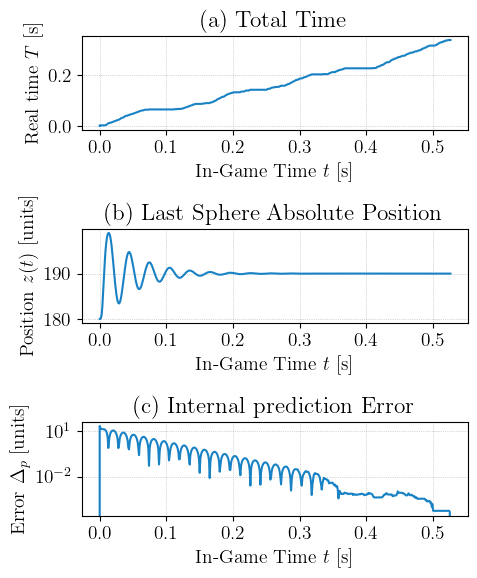

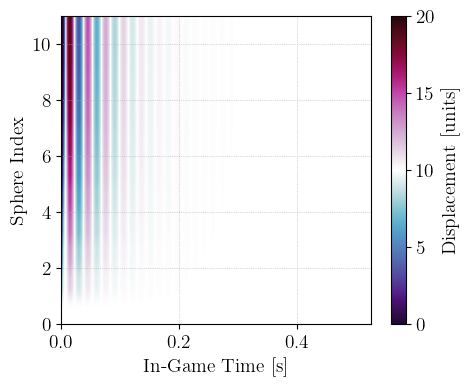

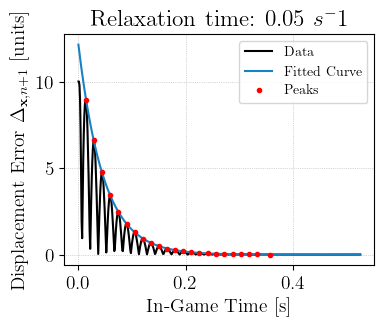

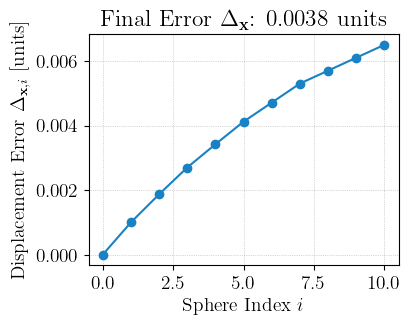

In [2]:
positions = read_json_file(PATH + "constraint_solver_steps_0/constraint_solver_steps_0_100/positions.json", verbose=False)

experiment1 = GuidewireExperiment(positions)

print(experiment1.timesteps)

experiment1.plot_experiment(axis=2)
plt.savefig(SAVE_PATH + "experiment1.pdf", bbox_inches="tight", dpi=300)
plt.show()

experiment1.plot_all_spheres(axis=2)
plt.savefig(SAVE_PATH + "experiment1_2.pdf", bbox_inches="tight", dpi=300)
plt.show()

_ = get_decay_rate(experiment1, [1,1], debug=True, offset=10, save=True)

# Constraint Solver Steps

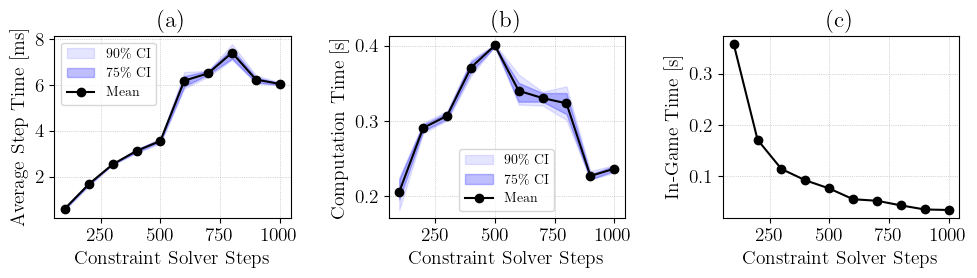

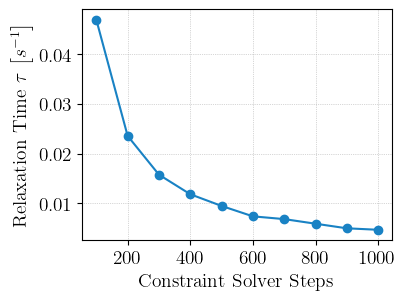

In [3]:
constraint_solver_steps = np.arange(100,1100,100)

xlabel = "Constraint Solver Steps"
name = "constraint_solver_steps"
steps = constraint_solver_steps

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)

# Time steps

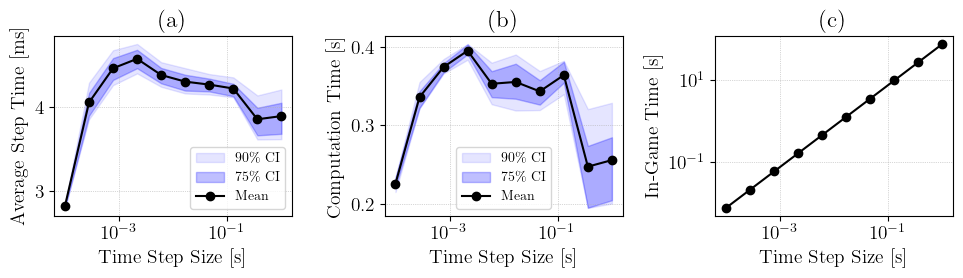

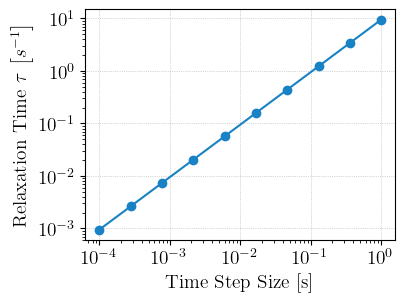

In [4]:
timesteps = np.logspace(-4, 0, 10)

xlabel = "Time Step Size [s]"
name = "time_steps"
steps = timesteps

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times, logx=[True, True, True, True], logy=[False, False, True, True])

# Rod Element Length

Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged


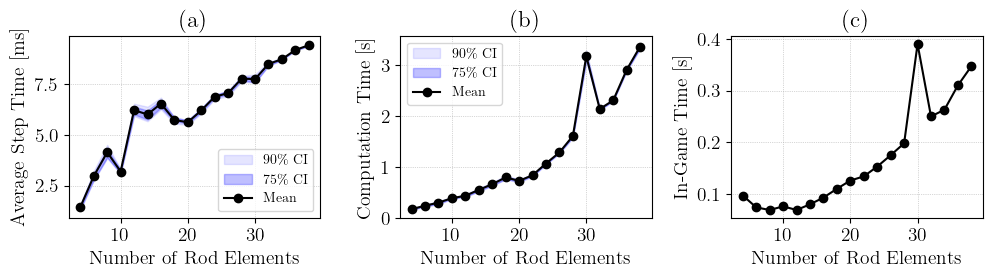

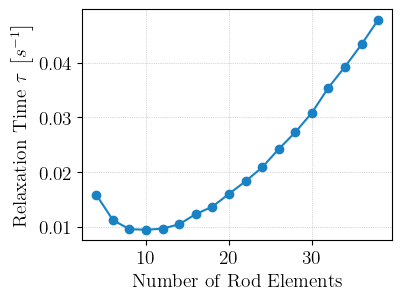

In [5]:
elements = np.arange(4,40,2, dtype="int").astype("float")

xlabel = "Number of Rod Elements"
name = "rod_elements"
steps = elements

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)#, logx=[True, True, True, True], logy=[False, False, True, True])

# Displacement

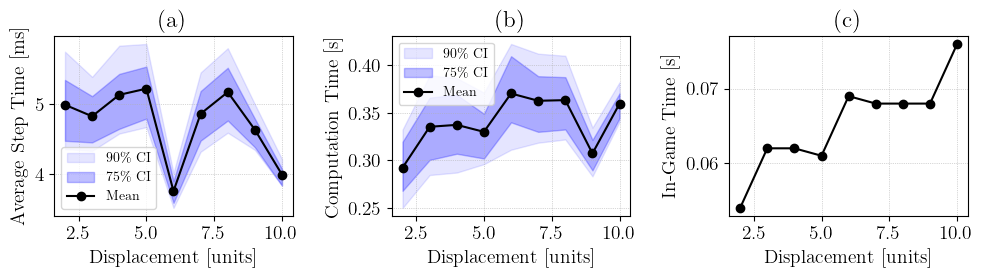

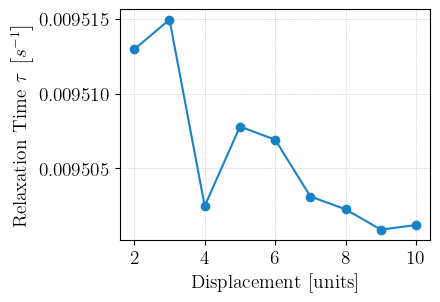

In [6]:
displacements = np.linspace(1,10, 10)[1:]

xlabel = "Displacement [units]"
name = "displacemen"
steps = displacements

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)
#, logx=[True, True, True, True], logy=[False, False, True, True])

# Total mass

Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged
Not converged


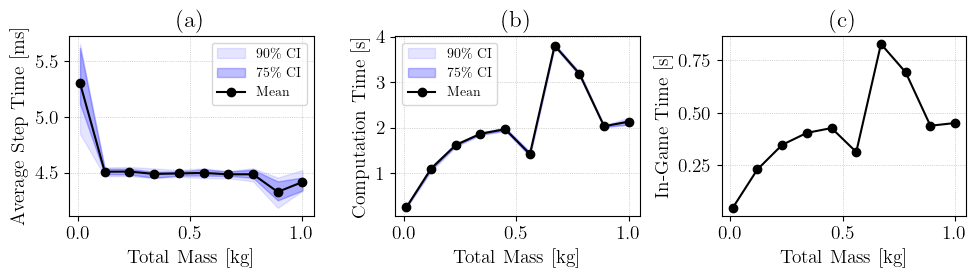

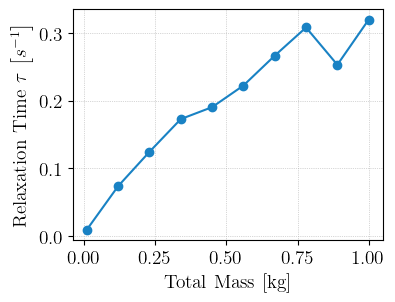

In [7]:
masses = np.linspace(0.01,1,10)

xlabel = "Total Mass [kg]"
name = "total_mass"
steps = masses

relaxation_times, offsets, loop_times, errors, params = get_all_data(name, steps, REPEAT, PATH, debug=False)

plot_result(xlabel, name, steps, loop_times, errors, relaxation_times)#, logx=[True, True, True, True], logy=[False, False, True, True])